## Homework 03: due 22:00, Wednesday, October 26, 2022

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Assignment number (e.g., b88501045-HW3), put all the python scripts and notebook files into the folder and zip the folder (e.g., b88501045-HW3.zip).
### - Submit the homework directly through the NTU COOL course website.


#### 0. Import essential modules

In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats as stats
import math

#### 1. (30%) Consider the following dataset, sampled from a distribution H. We would like to know the confidence intervals for some of their given statistical properties.

In [2]:
samples = [28.82, 22.00, 24.89, 31.20, 29.34, 15.11, 24.75, 19.24, 19.48,
       22.05, 20.72, 27.27, 23.81, 20.61, 22.22, 21.67, 27.47, 18.97,
       21.57, 15.73,  7.24, 23.27, 24.32, 16.29, 31.35, 12.73, 20.23,
       19.06, 27.66, 27.35, 20.77, 21.89, 15.56, 10.10, 18.26, 20.78,
       26.15, 26.01, 18.06, 18.49]

#### Please complete the following tasks.

##### 1.1 (10%) Assuming that the population standard deviation is well estimated by the sample standard deviation, find the 95% (two-sided) confidence level for the population mean.

#### If the population $\sigma$ is known, we can use *Normal Distribution*  to find the confidence interval for population mean 

---
$ Z =\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$ with $n$ degree of freedom where population standard deviation equals to $\sigma/\sqrt{n}$.

In [3]:
# Use the Normal Distribution calculate
sample_mean = np.mean(samples)
sample_stdev = np.std(samples, ddof = 1) # for sample the degree of freedom is n-1
n = len(samples)

population_stdev = sample_stdev/math.sqrt(n)
print(f'Population standard deviation is {population_stdev}')

Population standard deviation is 0.8520617895840835


In [4]:
# two-sided 95% confidence interval
# compute z
z_25 = stats.norm.ppf(0.025)
z_975 = stats.norm.ppf(0.975)

# calculate quantile
q_25 = sample_mean + z_25*population_stdev
q_975 = sample_mean + z_975*population_stdev

lower = format(q_25,'.4f')
upper = format(q_975, '.4f')
print('The lower confidence limit is', lower)
print('The upper confidence limit is', upper)
print(f'The 95% (two-sided) confidence level for the population mean is {lower} to {upper}')

The lower confidence limit is 19.8922
The upper confidence limit is 23.2323
The 95% (two-sided) confidence level for the population mean is 19.8922 to 23.2323


##### 1.2 (10%) Assuming that the population standard deviation is unknown, estimate the 95% (two-sided) confidence level for the population mean.

#### If the population $\sigma$ is unknown, we can use *Student T Distribution*  to find the confidence interval for population mean 

---
$ T =\frac{\bar{X}-\mu}{\hat{S_x}/\sqrt{n}}$ with $n-1$ degree of freedom where population standard deviation equals to $\hat{S_x}/\sqrt{n}$.

In [5]:
# degree of freedom in student t
dof = n-1

# compute t
t_25_dof = stats.t.ppf(0.025, df=dof)
t_975_dof = stats.t.ppf(0.975, df=dof)

# calculate quantile
q_25 = sample_mean + t_25_dof*sample_stdev/math.sqrt(n)
q_975 = sample_mean + t_975_dof*sample_stdev/math.sqrt(n)

lower = format(q_25,'.4f')
upper = format(q_975, '.4f')

print('The lower confidence limit is', lower)
print('The upper confidence limit is', upper)
print(f'The 95% (two-sided) confidence level with unknown population standard deviation for the population mean is {lower} to {upper}')

The lower confidence limit is 19.8388
The upper confidence limit is 23.2857
The 95% (two-sided) confidence level with unknown population standard deviation for the population mean is 19.8388 to 23.2857


##### 1.3 (10%) Find the 95% (two-sided) confidence level for the population standard deviation.
#### To find the confidence interval for population *standard deviation*, we can use ${\chi}^2$ Distribution 

---
$ V =\frac{\hat{S_x}^2(n-1)}{\sigma^2}$  with $n-1$ degree of freedom where equals to ${\chi}^2$ distribution

In [6]:
sample_var = sample_stdev*sample_stdev
dof = n-1
print(f'The degree of freedom is {dof}, The number of value {n}.')

z_0025 = stats.chi2.ppf(0.025, df=dof) # chi-square distribution
z_975 = stats.chi2.ppf(0.975, df=dof)  

# confidence interval for population variance
q_25 = sample_var*(n-1)/z_975
q_975 = sample_var*(n-1)/z_0025

# standard deviation
lower = format(math.sqrt(q_25),'.4f')
upper = format(math.sqrt(q_975),'.4f')

print('The lower confidence limit is', lower)
print('The upper confidence limit is', upper)
print(f'The 95% (two-sided) confidence level for the population standard deviation is {lower} to {upper}')

The degree of freedom is 39, The number of value 40.
The lower confidence limit is 4.4144
The upper confidence limit is 6.9196
The 95% (two-sided) confidence level for the population standard deviation is 4.4144 to 6.9196


#### 2. (30%) From the attached data file _ETH-Kobo_Jan.csv_, you can find historical January rainfall for 1993-2020 in Kobo, Ethiopia. Suppose that rainfall data follows the Gamma distribution, Gamma(α,β), where α=0.86 and β=74.28. Please complete the following tasks.

For Gamma distribution, the calculations of moments are belowed:
- $E(x) = \alpha\beta$
- $Var(x) = \alpha\beta^2$

In [7]:
# import data
data = './Data/ETH-Kobo_Jan.csv'

# import and read csv file
df = pd.read_csv(data)
df.head()

,date,Kobo
0,1993/01,130.62800
1,1994/01,2.70096
2,1995/01,6.30129
3,1996/01,145.08200
4,1997/01,131.76000


In [8]:
data = df['Kobo']
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

In [9]:
nBootstraps = 100
nSamples = len(data)

# random seed is set to 0 (or any other integer) to ensure the sampling result remain the same
np.random.seed(0)
# Convert sample list to a numpy array
np_samples = np.array(data)

# arrays to record sample means and standard deviations resulting from resampling
resamples_mean = np.zeros(nBootstraps)
resamples_std = np.zeros(nBootstraps)

for b in range(nBootstraps):
    resamples_b = np.random.choice(np_samples, size = nSamples, replace=True)
    
    # Compute mean and standard deviation from the resampled array
    mean_resamples_b = np.mean(resamples_b)
    std_resamples_b = np.std(resamples_b, ddof = 1)
    
    resamples_mean[b] = mean_resamples_b
    resamples_std[b] = std_resamples_b

print(type(resamples_mean),len(resamples_mean))

<class 'numpy.ndarray'> 100


##### 2.1 (15%) Find the 95% (two-sided) confidence level for the population mean using empirical bootstrapping (please set the number of bootstraps as 100).

---
Empirical bootstrapping need to compute **delta**.

$\delta_{i}^{*} = \bar{x_{i}^{*}}-\bar{x_i}$

In [10]:
# compute delta
delta_mean = resamples_mean - sample_mean
delta_std = resamples_std - sample_std
# print(type(delta_mean), type(delta_std))

# Obtain the lower and upper CI limits
CI_mean_lower, CI_mean_upper = sample_mean - np.percentile(delta_mean,[97.5,2.5])
CI_std_lower, CI_std_upper = sample_std - np.percentile(delta_std,[97.5,2.5])

print('Two-sided 95% CIs for mean using empirical bootstrapping')
print('The lower limit of CI for mean =', format(CI_mean_lower, '.2f'))
print('The upper limit of CI for mean =', format(CI_mean_upper, '.2f'))

# print('Two-sided 95% CIs for standard deviation using empirical bootstrapping')
# print('The lower limit of CI for standard deviation =', format(CI_std_lower, '.2f'))
# print('The upper limit of CI for standard deviation =', format(CI_std_upper, '.2f'))

Two-sided 95% CIs for mean using empirical bootstrapping
The lower limit of CI for mean = 43.65
The upper limit of CI for mean = 83.68


##### 2.2	(15%) Find the 90% (two-sided) confidence level for the fitted parameters of the Gamma distribution using percentile bootstrapping (please set the number of bootstraps as 100).
---
Percentile bootstrapping no need to compute **delta**.

In [11]:
CI_mean_lower, CI_mean_upper = np.percentile(resamples_mean,[5.0, 95.0])
CI_std_lower, CI_std_upper = np.percentile(resamples_std,[5.0, 95.0])

print('Two-sided 90% CIs for mean using percentile bootstrapping')
print('The lower limit of CI for mean =', format(CI_mean_lower, '.2f'))
print('The upper limit of CI for mean =', format(CI_mean_upper, '.2f'))

print('Two-sided 90% CIs for standard deviation using percentile bootstrapping')
print('The lower limit of CI for standard deviation =', format(CI_std_lower, '.2f'))
print('The upper limit of CI for standard deviation =', format(CI_std_upper, '.2f'))

Two-sided 90% CIs for mean using percentile bootstrapping
The lower limit of CI for mean = 49.69
The upper limit of CI for mean = 82.37
Two-sided 90% CIs for standard deviation using percentile bootstrapping
The lower limit of CI for standard deviation = 46.54
The upper limit of CI for standard deviation = 59.53


#### 3. (50%) Taiwan had done a great job in preventing local transmission of COVID-19 for over a year. However, due to a series of unfortunate events, local infections outbroke in May 2020. In the attached file _Covid19_TPE.csv_, you can find the records for the number of infected from 2021/05/15 to 2021/06/13 for Taipei City. Your task is to evaluate if the ‘soft’ lockdown introduced on 2021/05/15 by the Taipei City  work. More specifically, considering the 14-day incubation period of COVID-19, we want to compare if there is a decrease in the average number of infections before and after the 14-day incubation period (i.e., the potential effective date starting on 2021/05/29 in Taipei). Please perform the statstical tests under the following different scenarios.

In [12]:
# import data
data = './Data/Covid19_TPE.csv'

# import and read csv file
df = pd.read_csv(data)
df.head()

,date,Taipei_Infected
0,15/05/2021,86
1,16/05/2021,93
2,17/05/2021,158
3,18/05/2021,103
4,19/05/2021,70


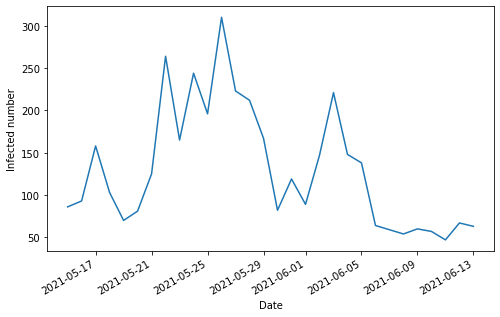

In [13]:
import matplotlib.pyplot as plt

#define the A and B data
f_A = np.array(df[:14]['Taipei_Infected'])
f_B = np.array(df[14:]['Taipei_Infected'])
# print(f_A,f_B)

# make 'date' as datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

#plot the figure
f = np.concatenate((f_A,f_B))
plt.rcParams["figure.figsize"] = (8,5)
plt.plot(df['date'], f)
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Infected number');

##### 3.1 (10%) Scenario 1 (asymmetric case): $\mu_A$ is known; $\mu_B$ is not known; $\sigma_B=\sigma_A = \sigma$

1. Null Hypothesis $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis $ H_1: \mu_B> \mu_A$
3. Test statistic $Z = \frac{\bar{X}_{B}-\mu_B}{\sigma/\sqrt{n}}$
4. Distribution of test statistic $Z \sim N(0,1)$
5. Critical Region $\Re$: $Z>z_\alpha$ (e.g. $\alpha=1$\%)
6. Evaluate $Z$ under $H_0$  & if $z_0>z_\alpha \Rightarrow$ Reject $H_0$
7. $p$-value: $p(Z>z_0)$

In [14]:
f_a_samplemean = np.mean(f_A)
mu_a = f_a_samplemean
f_a_samplestd = np.std(f_A, ddof=1)
sigma = f_a_samplestd

n = len(f_B)
mu_b = mu_a
f_b_samplemean = np.mean(f_B)

Z = (f_b_samplemean-mu_b)/(sigma/np.sqrt(n))

alpha = 0.01
z_alpha = stats.norm.ppf(1-alpha)

print(f'Test statistic Z is {Z:.4f}')
print(f'z_alpha is {z_alpha:.4f}')

if Z > z_alpha:
    p_value = 1-stats.norm.cdf(Z)
    print(f'Reject H0, and the p-value is {p_value:.4f}')
else:
    print('No ground to reject H0')

Test statistic Z is -3.5208
z_alpha is 2.3263
No ground to reject H0


##### 3.2 (10%) Scenario 2 (asymmetric case): $\mu_A$ is known; $\mu_B$ is not known; $\sigma_B$ is not known

1. Null Hypothesis $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis $ H_1: \mu_B> \mu_A$
3. Test statistic $T = \frac{\bar{X}_{B}-\mu_B}{\hat{S_x}_B/\sqrt{n}}$
4. Distribution of test statistic $T \sim t(n-1)$
5. Critical Region $\Re$: $T>t_{n-1,\alpha}$ (e.g. $\alpha=1$\%)
6. Evaluate $T$ under $H_0$  & if $t_0>t_{n-1,\alpha} \Rightarrow$ Reject $H_0$
7. $p$-value: $p(T>t_0)$

In [15]:
f_a_samplemean = np.mean(f_A)
mu_a = f_a_samplemean
f_b_samplestd = np.std(f_B, ddof=1)
f_b_samplemean = np.mean(f_B)

n = len(f_B)
mu_b = mu_a


T = (f_b_samplemean - mu_b)/(f_b_samplestd/np.sqrt(n))

df = len(f_B)-1

alpha = 0.01
t_alpha = stats.t.ppf(1-alpha,df)

print(f'test statistic T = {T:.4f}')
print(f't_alpha = {t_alpha:.4f}')
    
    
p_value = 1 - stats.t.cdf(T,df)
# print(p_value)


if T > t_alpha:
    p_value = 1 - stats.t.cdf(T,df)
    print(f'Reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'No ground to reject H0.')

test statistic T = -5.2536
t_alpha = 2.6025
No ground to reject H0.


##### 3.3 (10%) Scenario 3 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B$ is known; $\sigma_A$ is known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A \neq \mu_B$
3. Test statistic: $Z = \frac{(\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)}{\sigma_{{\bar{X}_A} -{\bar{X}_B}} }$
4. Distribution of test statistic: $Z \sim N(0,1)$
5. Critical Region $\Re$: $|Z|>z_{\alpha/2}$ (e.g. $\alpha=5$\%)
6. Evaluate $Z$ under $H_0$: if $|z_0|>z_{\alpha/2} \Rightarrow$ Reject $H_0$
7. $p$-value & $p(|Z|>z_0)$

where $\sigma_{{\bar{X}_A} -{\bar{X}_B}} = \sqrt{\frac{\sigma_A^2}{n_A} +\frac {\sigma_B^2}{n_B} }$ 

In [16]:
f_a_samplemean = np.mean(f_A)
f_a_samplestd = np.std(f_A, ddof=1)
sigma_a = f_a_samplestd

f_b_samplestd = np.std(f_B, ddof=1)
f_b_samplemean = np.mean(f_B)
sigma_b = f_b_samplestd

n_a = len(f_A)
n_b = len(f_B)

sigma_A_B = np.sqrt((sigma_a*sigma_a/n_a) + (sigma_b*sigma_b/n_b))

Z = (f_a_samplemean-f_b_samplemean)/sigma_A_B

alpha = 0.01
z_alpha = stats.norm.ppf(1-alpha)

print(f'test statistic Z = {Z:.4f}')
print(f'z_alpha = {z_alpha:.4f}')
p_value = 1-stats.norm.cdf(Z)

if Z > z_alpha:
    print(f'Reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'No ground to reject H0.')

test statistic Z = 2.7905
z_alpha = 2.3263
Reject H0, and the p-value is 0.0026


##### 3.4 (10%) Scenario 4 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B= \sigma_A = \sigma$ is not known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A > \mu_B$
3. Test statistic: $t = \frac{ (\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)} {\widehat{S}_{X_A,X_B} \sqrt{\frac{1}{n_A} +\frac{1}{n_B} } } $
4. Distribution of test statistic: $T \sim t(n_A +n_B -2)$
5. Critical Region $\Re$: $T>t_{n_A+n_B-2,\alpha}$
6. Evaluate $T$ under $H_0$:if $t_0>t_{n_A+n_B-2,\alpha} \Rightarrow$ Reject $H_0$
7. $p$-value: $p(T>t_0)$

where $\widehat{S}_{X_A,X_B}^2 =  \frac{(n_A-1) \widehat{S}_{X_A}^2 +(n_B-1) \widehat{S}_{X_B}^2  }{n_A + n_B - 2}$

In [17]:
f_a_samplemean = np.mean(f_A)
f_a_samplestd = np.std(f_A, ddof=1)

f_b_samplemean = np.mean(f_B)
f_b_samplestd = np.std(f_B, ddof=1)

n_a = len(f_A)
n_b = len(f_B)

stdev_sample_A_B = np.sqrt((((n_a-1)*f_a_samplestd*f_a_samplestd) + ((n_b-1)*f_b_samplestd*f_b_samplestd))/(n_a+n_b-2))

T = np.abs((f_a_samplemean - f_b_samplemean))/(stdev_sample_A_B*np.sqrt(1/n_a+1/n_b))

df = n_a+n_b-2

alpha = 0.01
t_alpha = stats.t.ppf(1-alpha,df)

print(f'test statistic T = {T:.4f}')
print(f't_alpha = {t_alpha:.4f}')

p_value = 1-stats.t.cdf(T,df)

if T > t_alpha:
    print(f'Reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'No ground to reject H0.')

test statistic T = 2.8648
t_alpha = 2.4671
Reject H0, and the p-value is 0.0039


##### 3.5 (10%) Scenario 5 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B$ is not known; $\sigma_A$ is not known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A > \mu_B$
3. Test statistic: $R = \frac{ (\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)} { \sqrt{\frac{\hat{S_x}_{A}^2 }{n_A} +\frac{\hat{S_x}_{B}^2}{n_B} } }  $
4. Distribution of test statistic: $R \sim t(\nu)$
5. Critical Region $\Re$: $R>t_{\nu,\alpha}$
6. Evaluate $R$ under $H_0$: if $r_0>t_{\nu,\alpha} \Rightarrow$ Reject $H_0$
7. $p$-value: $p(R>r_0)$

$\nu \approx  \left( \frac{\hat{S_x}_{A}^2 }{n_A} +\frac{\hat{S_x}_{B}^2}{n_B} \right)^2 / \left[ \frac{1}{n_A-1} \left( \frac{\hat{S_x}_{A}^2 }{n_A} \right)^2 + \frac{1}{n_B-1} \left( \frac{\hat{S_x}_{B}^2 }{n_B} \right)^2 \right]$


In [18]:
f_a_samplemean= np.mean(f_A)
f_a_samplestd = np.std(f_A, ddof=1)

f_b_samplemean = np.mean(f_B)
f_b_samplestd = np.std(f_B, ddof=1)

n_a = len(f_A)
n_b = len(f_B)

S_xA_n = f_a_samplestd*f_a_samplestd/n_a
S_xB_n = f_b_samplestd*f_b_samplestd/n_b

R = np.abs((f_a_samplemean - f_b_samplemean))/np.sqrt(S_xA_n + S_xB_n)

nu = (S_xA_n+S_xB_n)**2/(S_xA_n*S_xA_n/(n_a-1) + S_xB_n*S_xB_n/(n_b-1))

alpha = 0.01
t_alpha = stats.t.ppf(1-alpha,nu)

print(f'test statistic T = {R:.4f}')
print(f't_alpha = {t_alpha:.4f}')

p_value = 1-stats.t.cdf(R,nu)

if R > t_alpha:
    
    print(f'Reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'No ground to reject H0, and the p-value is {p_value:.4f}')

test statistic T = 2.7905
t_alpha = 2.5062
Reject H0, and the p-value is 0.0053
